In [1]:
import pandas as pd
import numpy as np
import sklearn.metrics
import sklearn.ensemble
import sklearn.model_selection
from sklearn.feature_extraction.text import TfidfVectorizer

import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('talk')

In [2]:
# Read the Excel file into a dictionary of DataFrames
file_path = r'C:\Users\stlp\dow_dataset\PSE_Dataset.xlsx'
excel_data = pd.read_excel(file_path, sheet_name=None)

# Concatenate all sheets into a single DataFrame
all_sheets = list(excel_data.values())
combined_data = pd.concat(all_sheets, ignore_index=True)

train, test = sklearn.model_selection.train_test_split(combined_data, test_size=0.2, random_state=206)

In [3]:
# tokenize the text data using tf-idf vectorizer
vectorizer = TfidfVectorizer()
train_text = train['Report'].values
test_text = test['Report'].values

train_label = train['Level'].values
test_label = test['Level'].values

train_x = vectorizer.fit_transform(train_text)
train_y = train_label

test_x = vectorizer.transform(test_text)
test_y = test_label

In [4]:
# train a Random Forest model
model = sklearn.ensemble.RandomForestClassifier(n_estimators=200)
model.fit(train_x, train_y)

RandomForestClassifier(n_estimators=200)

In [5]:
# accuracy report
print("Model accuracy:", model.score(test_x, test_y))

predict_y = model.predict(test_x)

print(sklearn.metrics.classification_report(test_y, predict_y, digits=4))

Model accuracy: 0.65
              precision    recall  f1-score   support

           1     1.0000    0.8571    0.9231         7
           2     0.3571    0.5000    0.4167        10
           3     0.5455    0.4000    0.4615        15
           4     0.6154    0.5714    0.5926        14
           5     0.8750    1.0000    0.9333        14

    accuracy                         0.6500        60
   macro avg     0.6786    0.6657    0.6654        60
weighted avg     0.6603    0.6500    0.6486        60



<Axes: >

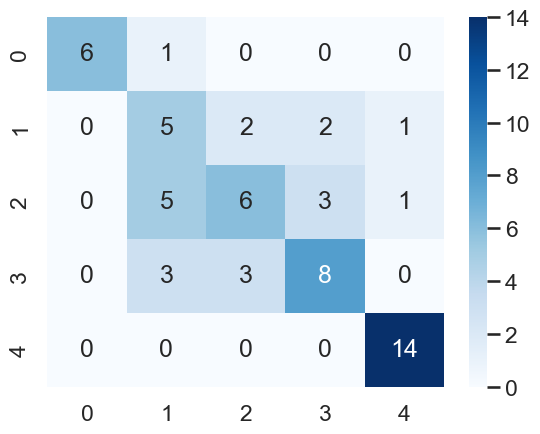

In [6]:
# plot a confusion matrix
cm = sklearn.metrics.confusion_matrix(test_y, predict_y)
sns.heatmap(cm, annot=True, cmap='Blues')